In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [ ]:
tf.debugging.set_log_device_placement(False)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_csv_path = r'/content/drive/MyDrive/datasets/icml_face_data.csv'
emotions = {0: 'Angry', 1:'Disgust', 2:'Fear',3: 'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'}
df = pd.read_csv(train_csv_path)
df.head(5)

,emotion,usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


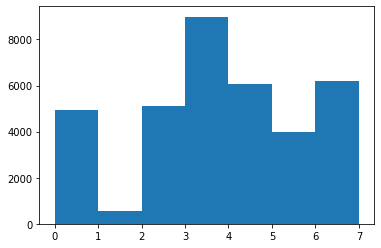

In [ ]:
counts, bins = np.histogram(df['emotion'], list(range(0,8)))
plt.stairs(counts, bins, fill=True)

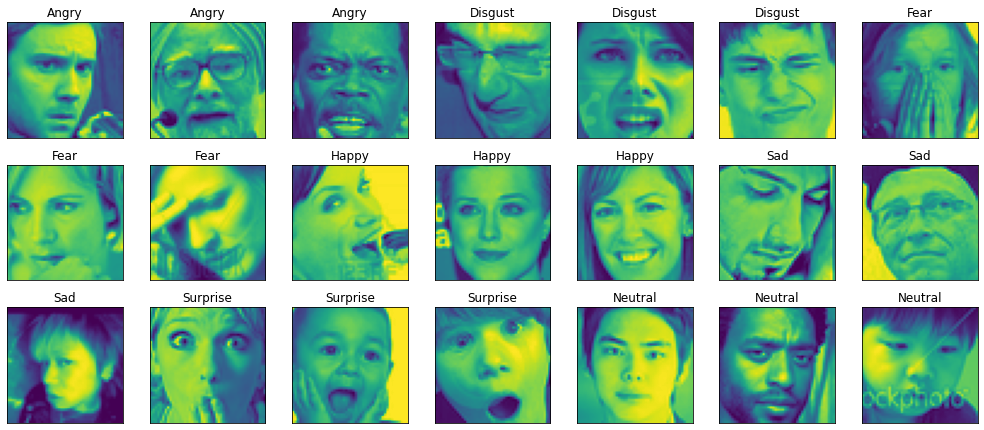

In [ ]:
fig = plt.figure(1, (14, 14))
k = 0
for label in sorted(df.emotion.unique()):
    for j in range(3):
        px = df[df.emotion==label].pixels.iloc[k]
        px = np.array(px.split(' ')).reshape(48, 48).astype('float32')
        k += 1
        ax = plt.subplot(7, 7, k)
        ax.imshow(px)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(emotions[label])
        plt.tight_layout()

In [ ]:
# img_array = df.pixels.apply(lambda px : np.array(px.split(' ')).reshape(48, 48, 1).astype('float32'))
pixels = np.array(df['pixels'].str.split().tolist(), dtype='float32')
img_array = pixels.reshape(pixels.shape[0], 48, 48, 1)

In [ ]:
img_array = np.stack(img_array, axis=0)
labels = df.emotion.values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(img_array, labels, test_size=0.2)

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
# https://www.analyticsvidhya.com/blog/2021/11/facial-emotion-detection-using-cnn/
input_shape=(48,48,1)
block_1_num_chanels = 64 # num_chanels
block_2_num_chanels  = 128 # num_chanels
block_3_num_chanels  = 256 # num_chanels
block_4_num_chanels = 512 # num_chanels
block_5_num_chanels = 1024 # num_chanels

basemodel = tf.keras.Sequential([
tf.keras.layers.RandomRotation(0.2),

tf.keras.Input(shape=input_shape, name='input'),
# block 1
tf.keras.layers.Conv2D(block_1_num_chanels, kernel_size=3, activation='relu', padding='same'),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Conv2D(block_1_num_chanels, kernel_size=3, activation='relu', padding='same'),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Conv2D(block_1_num_chanels, kernel_size=3, activation='relu', padding='same'),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Conv2D(block_1_num_chanels, kernel_size=3, activation='relu', padding='same'),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
tf.keras.layers.Dropout(0.3),

# block 2
tf.keras.layers.Conv2D(block_2_num_chanels, kernel_size=3, activation='relu', padding='same'),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Conv2D(block_2_num_chanels, kernel_size=3, activation='relu', padding='same'),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Conv2D(block_2_num_chanels, kernel_size=3, activation='relu', padding='same'),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Conv2D(block_2_num_chanels, kernel_size=3, activation='relu', padding='same'),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
tf.keras.layers.Dropout(0.3),

# block 3
tf.keras.layers.Conv2D(block_3_num_chanels, kernel_size=3, activation='relu', padding='same'),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Conv2D(block_3_num_chanels, kernel_size=3, activation='relu', padding='same'),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Conv2D(block_3_num_chanels, kernel_size=3, activation='relu', padding='same'),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Conv2D(block_3_num_chanels, kernel_size=3, activation='relu', padding='same'),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
tf.keras.layers.Dropout(0.3),

# block 4
tf.keras.layers.Conv2D(block_4_num_chanels, kernel_size=3, activation='relu', padding='same'),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Conv2D(block_4_num_chanels, kernel_size=3, activation='relu', padding='same'),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Conv2D(block_4_num_chanels, kernel_size=3, activation='relu', padding='same'),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Conv2D(block_4_num_chanels, kernel_size=3, activation='relu', padding='same'),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
tf.keras.layers.Dropout(0.3),

# block 5
tf.keras.layers.Conv2D(block_5_num_chanels, kernel_size=3, activation='relu', padding='same'),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Conv2D(block_5_num_chanels, kernel_size=3, activation='relu', padding='same'),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Conv2D(block_5_num_chanels, kernel_size=3, activation='relu', padding='same'),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Conv2D(block_5_num_chanels, kernel_size=3, activation='relu', padding='same'),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
tf.keras.layers.Dropout(0.3),


tf.keras.layers.Flatten(),
tf.keras.layers.Dense(512, activation='relu'),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(7, activation='softmax')
])

In [ ]:
basemodel.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# basemodel.summary()


In [ ]:
import os
try:
  os.mkdir('checkpoint')
except:
  pass

In [ ]:
file_name = 'best_model.h5'
checkpoint_path = os.path.join('/content/drive/MyDrive/datasets/checkpoint', file_name)


call_back = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, 
                                                 monitor='val_accuracy', 
                                                 verbose=1,
                                                 save_freq='epoch',
                                                 save_best_only=True, 
                                                 save_weights_only=False, 
                                                 mode='max')

In [ ]:
history = basemodel.fit(X_train, y_train,batch_size=128, epochs=60, validation_split=0.2, callbacks=call_back)

Epoch 1/60


180/180 [==============================] - ETA: 0s - loss: 2.0244 - accuracy: 0.2258
Epoch 1: val_accuracy improved from -inf to 0.24138, saving model to /content/drive/MyDrive/datasets/checkpoint/best_model.h5
180/180 [==============================] - 199s 929ms/step - loss: 2.0244 - accuracy: 0.2258 - val_loss: 1.8347 - val_accuracy: 0.2414
Epoch 2/60
180/180 [==============================] - ETA: 0s - loss: 1.7866 - accuracy: 0.2573
Epoch 2: val_accuracy did not improve from 0.24138
180/180 [==============================] - 151s 840ms/step - loss: 1.7866 - accuracy: 0.2573 - val_loss: 1.8570 - val_accuracy: 0.2414
Epoch 3/60
180/180 [==============================] - ETA: 0s - loss: 1.7638 - accuracy: 0.2672
Epoch 3: val_accuracy did not improve from 0.24138
180/180 [==============================] - 153s 849ms/step - loss: 1.7638 - accuracy: 0.2672 - val_loss: 1.9380 - val_accuracy: 0.1803
Epoch 4/60
180/180 [==============================] - ETA: 0s - loss: 1.7424 - accuracy: 0

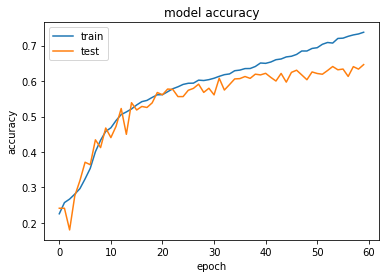

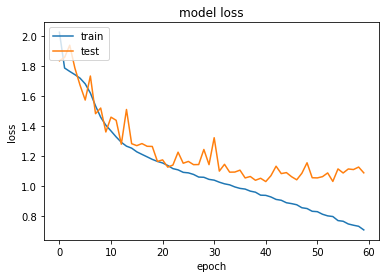

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Actual label is Sad
1/1 [==============================] - 1s 779ms/step
Predicted label is Fear


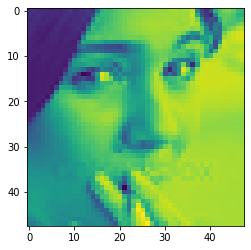

In [ ]:
final_model = tf.keras.models.load_model(checkpoint_path)
from IPython.display import clear_output
import time

for k in range(3):
  print(f'Actual label is {emotions[y_test[k]]}')
  predicted_class = final_model.predict(tf.expand_dims(X_test[k], 0)).argmax()
  print(f'Predicted label is {emotions[predicted_class]}')
  plt.imshow(X_test[k])
  plt.show()
  time.sleep(3)
  clear_output(wait=True)
